The best argument against Anova is to show how the analysis will look like if we used parameter estimation instead. As I already mentioned Anova can be abandoned in favor of regression. Most psychologists think of linear regression. However, the approach extends to general linear models of the sort $y=f(b_0+b_1\cdot x_1 + b_2\cdot x_2 \dots)$. Linear regression is just a special case where $f(\cdot)$ is the identity function $y=x$. 

When the outcome variable takes binary values $0,1$ then it is better to use logistic regression. Here the link function is the [logistic function](https://en.wikipedia.org/wiki/Logistic_function)  $f(x)= 1/(1+e^{-x})$. As with any kind of data the default approach in psychology research is to analyze binary outcomes with Anova. Let's see what are the consequences.

In this demonstration we will take a look at a study by Mussel and colleagues [published](http://journal.sjdm.org/12/12817/jdm12817.html) in JDM.

The study investigated whether a smiling/angry/neutral face influences collaboration in an [ultimatum game](https://en.wikipedia.org/wiki/Ultimatum_game) (i.e. prisoner's dilemma with no iteration). The subjects were shown facial expression of the opponent avatar and the amount of money he offered. Then they were asked whether they wish to collaborate. The opponent could propose to share a fraction from the total of 14 cents. The offers ranged from 7c (overly fair) to 1c (unfair) in 1c steps and subjects decided whether they accept the offer or not. The authors also varied whether the face was male or female. The combination of these factors gives us 2x3x7=42 stimuli. Each of 1326 subjects was shown all 42 stimuli in random order and either collaborated (1) or not (0). Trial ended if subjects failed to respond within a 3 second time limit. In the data set these trials were marked as missing values. Next, authors replaced missing values with subject-wise averages. They then analysed the data with a repeated-measures Anova with two factors: fairness (7 levels) and face expression (3 levels). As the high N suggests both main-effects and their interaction were significant. 

Also all post-hoc comparisons were significant (p<.05, bonf. corrected). Smiling conditions had higher collaboration rate than neutral and neutral was in turn higher than angry. When subjects were offered more money they collaborated more. So what can we conclude? Not much. Smiling face increases the offer acceptance. More generous offer does also increase acceptance. We have no clue where the interaction comes from. 

With N=1326 the $p$ values are almost entirely driven by the large sample size. But of course the magnitude of the effect matters. If the collaboration rate is 70 % for smiling faces and 40% for neutral than this is notable. But if the rates are 51 and 50% respectively we don't really care. If the collaboration rates were 91% and 90% we might consider the study inconclusive due to ceiling effects. $p$ values are inherently incapable of providing this information. We need effect size estimates.

We are fortunate. Mussel et al. are good academic citizens and report the standardized effect size. 

$$ \eta_{\mathrm{face}}=.1 $$
$$ \eta_{\mathrm{money}}=.39 $$
$$ \eta_{\mathrm{money}\times \mathrm{face}}=.01 $$

Are we smarter now? How should we interpret these effect sizes? Is $ \eta_{\mathrm{face}}=.1 $ more like the 70%-40% difference or more like the 51%-50% difference? Presumably, the last question is not what we are supposed to ask. Rather, we need to survey the decision making literature to see what are the usual effect sizes and take these as a benchmark for comparison. Taking the values reported for experimental psychology  in Fritz et al. (2011) as a reference we would say that the facial expression has small effect while money has medium effect on acceptance. The interaction shows minuscule effect size and should be presumably discarded. 

One difficulty with this interpretation is that the sums of squares, on which $\eta$ is based, depend on the variance in the predictors. The effect size could be improved by using fewer money offer levels. Similar, the addition of face gender factor presumably increases the error variance and makes the effect size estimates smaller. As such effect size can't be compared across studies, not even across replications if these aren't exact. 

The only reason why most of the papers that include Anova analyses are worth reading after all, is that they include a figure with plotted group averages. Mussel et al. show mercy and give us the following graph. 
<image src="http://journal.sjdm.org/12/12817/jdm12817002.png"> </image>

Ok. Now we see it. The interaction is probably due to ceiling/floor effects for large and small money offers respectively. We are really interested in what happens in the middle. Here, the extra smile increases (compared to neutral face) the acceptance by ca. 5%. Angry face shows an effect of similar magnitude but goes in the opposite direction. Why is it not possible to do this kind of analysis formally? It is. But we need to something else than Anova.

We formulate a regression model with acceptance ($\mathrm{coop}$) as outcome and face expression ($\mathrm{face}$) and offered money sum ($\mathrm{fair}$) as predictors.

$$\mathrm{coop}_{i,j} \sim \mathrm{Bern}(\pi_{i,j})$$

$$\pi_{i,j} = \mathrm{logit}^{-1}(\alpha_{\mathrm{face}[i,j]}+\beta_{\mathrm{face}[i,j]}\mathrm{fair}[i,j])(1-\gamma_{\mathrm{face}[i,j]}-\delta_{\mathrm{face}[i,j]})+\gamma_{\mathrm{face}[i,j]}$$

We enter the offered sum as continuous predictor of acceptance at each trial $j$ for each subject $i$. We fit a separate model for each type of face expression and for each subject. $\mathrm{face}[i,j]$ is the index of the face expression which subject $i$ saw at trial $j$. The parameters $\gamma$ and $\delta$ determine the level (of acceptance) where the logit function becomes flat. Without this addition the logit curve would become flat at $[0,1]$. We can see from the figure from the paper that this is not the case. 

Let's look at how the logistic function works by playing around with its parameters.

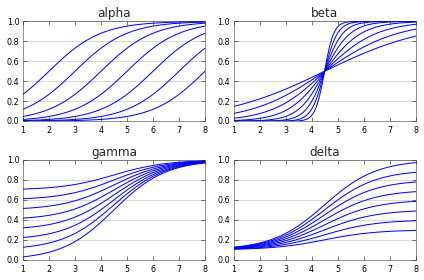

In [14]:
from scipy.stats import scoreatpercentile as sap
%pylab inline
clr=(0.2, 0.5, 0.6)
plt.figure(figsize=(6,4))
plt.subplot(2,2,1);plt.title('alpha')
x=np.arange(1,9,0.1)
for a in np.arange(2,9).tolist():
    y=1/(1+exp(a-1*x))*1+0
    plt.plot(x,y,'b')
plt.grid(b=False,axis='x');plt.ylim([0,1]);plt.xlim([1,8])
plt.subplot(2,2,2);plt.title('beta')
for b in np.arange(-1,3,0.5).tolist():
    y=1/(1+exp(4.5*2**b-2**b*x))*1+0
    plt.plot(x,y,'b')
plt.grid(b=False,axis='x');plt.ylim([0,1]);plt.xlim([1,8])
plt.subplot(2,2,3);plt.title('gamma')
for c in np.arange(0,0.8,0.1).tolist():
    y=1/(1+exp(4.5-x))*(1-c)+c
    plt.plot(x,y,'b'); 
plt.grid(b=False,axis='x');plt.ylim([0,1]);plt.xlim([1,8])
plt.subplot(2,2,4);plt.title('delta')
for d in np.arange(0,0.8,0.1).tolist():
    y=1/(1+exp(4.5-x))*(1-0.1-d)+0.1
    plt.plot(x,y,'b'); 
plt.grid(b=False,axis='x');plt.ylim([0,1]);plt.xlim([1,8]);

We see that $\alpha$ shifts the function on the x axis. $\beta$ alters the steepness of the function. As already mentioned $\gamma$ and $\delta$ determine the floor and the ceiling of the function.

Next let's perform the analysis. We first load the data.

In [5]:
from urllib import urlopen
f=urlopen('http://journal.sjdm.org/12/12817/data.csv')
D=np.loadtxt(f,skiprows=3,delimiter=',')[:,7:]
f.close()
D.shape

(1326, 42)

We put the data into Anova format.

In [6]:
# predictors
vfair=np.array(([range(1,8)]*6)).flatten() # in cents
vmale=np.ones(42,dtype=int); vmale[21:]=0
vface=np.int32(np.concatenate([np.zeros(7),
        np.ones(7),np.ones(7)*2]*2))
# anova format
sid=[];face=[];fair=[]
for i in range(D.shape[0]):
    for j in range(D.shape[1]):
        sid.append(i)
        face.append(vface[j])
        fair.append(vfair[j])
coop=D.flatten()
sid=np.array(sid)
face=np.array(face)
fair=np.array(fair)
assert np.all(coop[:42]==D[0,:])
print coop.size,len(sid),len(face),len(fair)
print D.shape

55692 55692 55692 55692
(1326, 42)


It is good to do some manual fitting to see just how the logistic curve behaves but also to assure ourselves that the we can get the desired shape out of the function. 

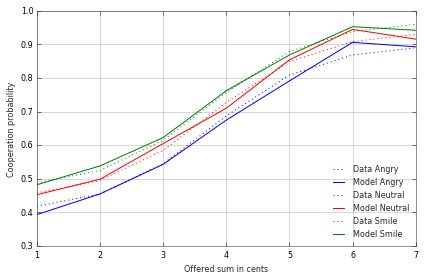

In [8]:
D[D==2]=np.nan
R=np.zeros((3,7))
for i in np.unique(vface).tolist():
    for j in np.unique(vfair).tolist():
        sel=np.logical_and(i==vface,j==vfair)
        R[i,j-1]=np.nansum(D[:,sel])/(~np.isnan(D[:,sel])).sum()
for i in range(3):
    y=1/(1+exp(4.5-1.2*np.arange(1,8)))*0.5+[0.4,0.44,0.47][i]
    plt.plot(range(1,8),y,':',color=['b','r','g'][i])
    plt.plot(range(1,8),R[i,:],color=['b','r','g'][i])
plt.legend(['Data Angry','Model Angry','Data Neutral',
    'Model Neutral','Data Smile','Model Smile'],loc=4);
plt.xlabel('Offered sum in cents')
plt.ylabel('Cooperation probability');

Above I fitted the logistic curve to the data. I got the parameter values by trial-and-error. We want to obtain precise estimates and also we wish to get an idea about the uncertainty of the estimates. We implement the model in STAN.

In [5]:
import pystan

model = """
data {
    int<lower=0> N;
    int<lower=0,upper=1> coop[N]; // acceptance
    int<lower=0,upper=8> fair[N]; // fairness
    int<lower=1,upper=3> face[N]; // face expression
}
parameters {
    real<lower=-20,upper=20> alpha[3];
    real<lower=0,upper=10> beta[3];
    simplex[3] gamm[3];

}
transformed parameters{
    vector[N] x;
    for (i in 1:N)
        x[i]<-inv_logit(alpha[face[i]]+beta[face[i]]*fair[i])
            *gamm[face[i]][3]+gamm[face[i]][1];     
}
model {
    coop ~ bernoulli(x);
}
"""
sm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b138e62c537965b343fa6a7f909fc2d7 NOW.


Run it!

In [6]:
dat = {'N': coop.size,'coop':np.int32(coop),
    'fair':fair,'face':face+1,'sid':sid}
seed=np.random.randint(2**16)
fit=sm.sampling(data=dat,iter=6000,chains=4,thin=5,
                warmup=2000,n_jobs=4,seed=seed)
print pystan.misc._print_stanfit(fit,
        pars=['alpha','beta','gamm'],digits_summary=2)
w= fit.extract()
np.save('m1alpha',w['alpha'])
np.save('m1gamm',w['gamm'])
np.save('m1beta',w['beta'])
del w
del fit

INFO:pystan:NOW ON CHAIN 0
INFO:pystan:NOW ON CHAIN 1
INFO:pystan:NOW ON CHAIN 2
INFO:pystan:NOW ON CHAIN 3


Here are the results.

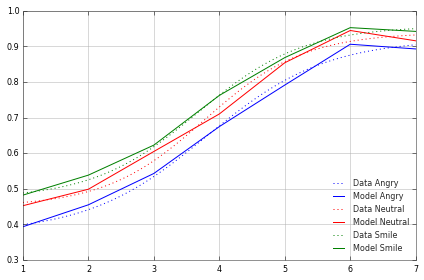

In [7]:
a=np.load('m1alpha.npy')
b=np.load('m1beta.npy')
g=np.load('m1gamm.npy')[:,:,0]
d=np.load('m1gamm.npy')[:,:,1]
for i in range(3):
    x=np.linspace(1,7,101)
    y=1/(1+exp(-np.median(a[:,i])-np.median(b[:,i])*x)) \
        *np.median(1-g[:,i]-d[:,i])+np.median(g[:,i])
    plt.plot(x,y,':',color=['b','r','g'][i])
    plt.plot(range(1,8),R[i,:],color=['b','r','g'][i])
plt.legend(['Data Angry','Model Angry','Data Neutral',
    'Model Neutral','Data Smile','Model Smile'],loc=4);

The model fits quite well. We now look at the estimated values for different face conditions.

(3200, 15)


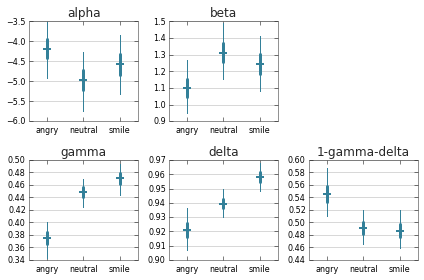

In [8]:
D=np.concatenate([a,b,g,1-d,1-g-d],1)
print D.shape
for n in range(D.shape[1]):
    plt.subplot(2,3,[1,2,4,5,6][n/3])
    k=n%3
    plt.plot([k,k],[sap(D[:,n],2.5),sap(D[:,n],97.5)],color=clr)
    plt.plot([k,k],[sap(D[:,n],25),sap(D[:,n],75)],
             color=clr,lw=3,solid_capstyle='round')
    plt.plot([k],[np.median(D[:,n])],mfc=clr,
             mec=clr,ms=8,marker='_',mew=2)
    plt.xlim([-0.5,2.5])
    plt.grid(b=False,axis='x')
    plt.title(['alpha','beta','gamma','delta','1-gamma-delta'][n/3])
    plt.gca().set_xticks([0,1,2])
    plt.gca().set_xticklabels(['angry','neutral','smile'])

The estimates show what we already more-or-less inferred from the graph. The 95% interval for $\alpha$ and $\beta$ coefficients are overlapping and we should consider model with the same horizontal shift and steepness for each of the face conditions. We see that the $\gamma$ and $\delta$ vary between the conditions. To better understand what is happening consider the width of the acceptance band in each condition given by $1-\gamma-\delta$ shown in the right bottom panel. From the figure it looks like all three curves occupy a band of the same width. The estimation confirms this for the case of neutral and smile condition whose estimates overlap almost perfectly. In the angry condition it is not clear where the bottom floor of the logit curve is located. The curve is still linear for lower offers. This means that a) the $1-\gamma-\delta$ estimate is larger in angry condition and b) the estimate is more uncertain. The differences in $\gamma$ and $\delta$ do also drive the Anova interaction to some extent.

Based on this discussion we simplify the model and use the same $\alpha$ and $\beta$ parameter value in all three conditions.

$$\mathrm{coop}_{i,j} \sim \mathrm{Bern}(\pi_{i,j})$$

$$\pi_{i,j} =\mathrm{logit}^{-1}(\alpha+\beta\cdot\mathrm{fair}[i,j])\cdot (1-\gamma_{\mathrm{face}[i,j]}-\delta_{\mathrm{face}[i,j]})+\gamma_{\mathrm{face}[i,j]}$$

Again, we do the computations in STAN.

In [18]:
import pystan

model = """
data {
    int<lower=0> N;
    int<lower=0,upper=1> coop[N]; // acceptance
    int<lower=0,upper=8> fair[N]; // fairness
    int<lower=1,upper=3> face[N]; // face expression
}
parameters {
    real<lower=-20,upper=20> alpha;
    real<lower=0,upper=10> beta;
    real<lower=0,upper=1> gamm[3];
    real<lower=0,upper=1> delt[3];
    

}
transformed parameters{
    vector[N] x;
    vector[3] gamma[3];
    for (i in 1:3){
        gamma[i][1]<-gamm[i];
        gamma[i][2]<-delt[i];
        gamma[i][3]<-1-gamm[i]-delt[i];
    }
    for (i in 1:N)
        x[i]<-inv_logit(alpha+beta*fair[i])
            *gamma[face[i]][3]+gamma[face[i]][1];     
}
model {
    coop ~ bernoulli(x);
}
"""
sm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_136eb1c03490516c519e5c7e31e39205 NOW.


In [ ]:
dat = {'N': coop.size,'coop':np.int32(coop),
       'fair':fair,'face':face+1,'sid':sid}
seed=np.random.randint(2**16)
fit=sm.sampling(data=dat,iter=5000,chains=4,thin=5,
                warmup=2000,n_jobs=4,seed=seed)
outpars=['alpha','beta','gamm','delt']
print pystan.misc._print_stanfit(fit,pars=outpars,digits_summary=2)
w= fit.extract()
for op in outpars: np.save(op,w[op])
del w
del fit

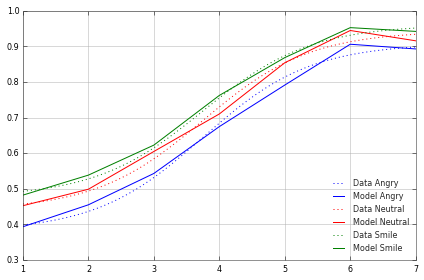

In [9]:
a=np.load('m2alpha.npy')
b=np.load('m2beta.npy')
g=np.load('m2gamm.npy')
d=np.load('m2delt.npy')
#D[D==2]=np.nan
for i in range(3):
    x=np.linspace(1,7,101)
    y=(1/(1+exp(-np.median(a)-np.median(b)*x)) 
        *np.median(1-g[:,i]-d[:,i])+np.median(g[:,i]))
    plt.plot(x,y,':',color=['b','r','g'][i])
    plt.plot(range(1,8),R[i,:],color=['b','r','g'][i])
plt.legend(['Data Angry','Model Angry','Data Neutral',
    'Model Neutral','Data Smile','Model Smile'],loc=4);

We see that the shape of the fitted curves isn't noticably affected by the model reduction.

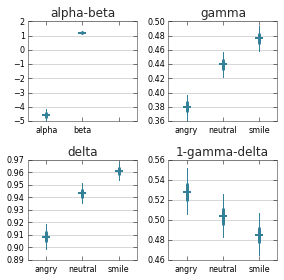

In [10]:
D=np.concatenate([np.atleast_2d(a),np.atleast_2d(b),
                  np.atleast_2d(b),g.T,1-d.T,1-g.T-d.T],0).T
for n in range(D.shape[1]):
    if n==2:continue
    plt.subplot(2,3,[1,2,4,5,6][n/3])
    k=n%3
    plt.plot([k,k],[sap(D[:,n],2.5),sap(D[:,n],97.5)],color=clr)
    plt.plot([k,k],[sap(D[:,n],25),sap(D[:,n],75)],color=clr,
             lw=3,solid_capstyle='round')
    plt.plot([k],[np.median(D[:,n])],mfc=clr,mec=clr,ms=8,marker='_',mew=2)
    plt.xlim([-0.5,2.5])
    plt.grid(b=False,axis='x')
    plt.title(['alpha-beta','gamma','delta','1-gamma-delta'][n/3])
    plt.gca().set_xticks([0,1,2])
    if n/3==0: plt.gca().set_xticklabels(['alpha','beta'])
    else: plt.gca().set_xticklabels(['angry','neutral','smile'])

There are possible extensions to the model. For instance we may be concerned about the fact the the comparison across conditions is done within-subject and that the observed values are not independent. We can extend the model by fitting separate logistic model to each subject. Consider the case of estimating a separate $\gamma$ parameter for each subject i.e. $\gamma_{i,\mathrm{face}[i,j]}$. We use hierarchical prior that pools the estimates across subjects and also takes care of the correlation between conditions.

$$ \begin{bmatrix}
\gamma_{i,s} \\ \gamma_{i,n} \\ \gamma_{i,a}
\end{bmatrix}
\sim \mathcal{N} \Bigg(
\begin{bmatrix}
\mu_s \\ \mu_n \\ \mu_a
\end{bmatrix}
,\Sigma \Bigg)$$

where
$$
\Sigma=
\begin{pmatrix}
\sigma_s^2 & \sigma_s r_{sn} \sigma_n & \sigma_s r_{sa} \sigma_a \\
\sigma_s r_{sn} \sigma_n & \sigma_n^2 & \sigma_n r_{na} \sigma_a \\
 \sigma_s r_{sa} \sigma_a & \sigma_n r_{na} \sigma_a & \sigma_a^2 \\
\end{pmatrix}
$$
For each condition we are estimating population mean $\mu$ and population variance $\sigma^2$. Furthermore, we estimate correlation  $r$ for each pair of conditions. As a consequence the estimated $\mu$ is not confounded by the correlation. We can add similar hierarchical prior for $\gamma_{i,\mathrm{face}[i,j]}$. I will not estimate this model since it is not so important for my current argument. I just wanted to show that the fact that the acceptance probability is correlated across conditions is not an obstacle to the regression approach.

So let's assume that the last model whose parameters we estimated with STAN is the correct one. What do we do next? We are interested in the difference in the acceptance rate between the conditions with different face expression. The problem is that the difference depends on the level on the amount of money offer. We can visualize this by using the neutral condition as baseline.

angry: -0.0453, -0.0534, -0.0372
angry: -0.0350, -0.0450, -0.0249
smile: 0.0256, 0.0179, 0.0333
smile: 0.0177, 0.0092, 0.0266


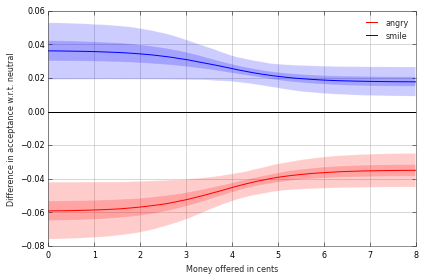

In [12]:
x=np.atleast_2d(np.linspace(0,8,101)).T
y=[]
a=np.atleast_2d(a);b=np.atleast_2d(b);
g=np.atleast_3d(g);d=np.atleast_3d(d);
for i in range(3):
    y.append(1/(1+exp(-a-b*x)).T*(1-g[:,i,:]-d[:,i,:])+g[:,i,:])
y=[y[0]-y[1],y[2]-y[1]]
x=np.concatenate([x,x[::-1]])
k=-1
for yy in y:
    ax=plt.gca();k+=1
    yyy=np.concatenate([sap(yy,2.5,axis=0),
                        sap(yy,97.5,axis=0)[::-1]])
    xy=np.concatenate([x,np.atleast_2d(yyy).T],axis=1)
    ax.add_patch(plt.Polygon(xy,alpha=0.2,
                             fc=['r','b'][k],ec='w'))
    yyy=np.concatenate([sap(yy,25,axis=0),
                        sap(yy,75,axis=0)[::-1]])
    xy=np.concatenate([x,np.atleast_2d(yyy).T],axis=1)
    ax.add_patch(plt.Polygon(xy,alpha=0.2,
                             fc=['r','b'][k],ec='w'))
    plt.plot(x[:x.size/2],np.median(yy,axis=0),['r','b'][k])  
plt.plot(x[:x.size/2],np.zeros(x.size/2),'k');
plt.legend(['angry','smile'])
plt.xlabel('Money offered in cents')
plt.ylabel('Difference in acceptance w.r.t. neutral')
for i in range(2):
    print ['angry','smile'][i]+': %.4f, %.4f, %.4f'%(np.median(y[i][:,50]),
                                sap(y[i][:,50],2.5),sap(y[i][:,50],97.5))
    print ['angry','smile'][i]+': %.4f, %.4f, %.4f'%(np.median(y[i][:,-1]),
                                sap(y[i][:,-1],2.5),sap(y[i][:,-1],97.5))

The graphics shows the interaction. The face expression affects the acceptance more strongly when the offer is unfair. The interaction is not that severe. Even if we compare the cooperation rate at the extreme edges of the range (1c and 7c) the percentile intervals are overlapping. So as a way of compromise we may just evaluate the differences in mid-range at 4c. We can then compress the results into one sentence. 
Making an angry face at the offer recipient decreases the cooperation rate by at least 4.5 percent [3.7,5.3] and the smiling face increases the cooperation rate by at least 2.6 percent [1.8,3.3].)
(Alternatively we can take a conservative approach and declare the results for >8c.) 

Note how this estimate goes beyond simple contrast that just computes the mean difference between the angry/smile and the neutral condition. The model is a device that allows us to extract the quantity from the data. Our model takes care of missing values, of imballanced groups (due to missing values). It accounts for the ceiling and floor effects. The model handles the missing values. The model also takes care of the correlation of subject's performance in different face conditions (not shown here). On the other hand it seems rather redundant to estimate the $\alpha$ and $\beta$ parameters. In the current case these did not differ noticably between the conditions but in other studies they may provide interesting insight. In particular both differences (across face conditions) in $\alpha$ and $\beta$ would show up as an ambivalent mix of significant interactions and main effects. Our analysis is more sensitive and refined in this respect. 

Curiously even in our context we can find use for $\beta$. $\beta$ expresses the increase in acceptance rate for each unit of money offered. We are mostly interested in the increase in the range between 2c and 6c. Here the curve is approximately linear with slope $\beta/4$.
We can use this fact to ask the following question. The paper Mussel et al. bears the title "What is the values of a smile". The implication of the title is that smile has a similar influence on the acceptance rate as a sum of money does. We can reformulate this question in the form of a following counterfactual. What is the sum of money we would need to offer a subject who saw neutral face so that his acceptance rate reaches a level it would have if he saw a smiling face. This quantity is given by $4(\mu_\mathrm{smile}-\mu_\mathrm{neutral})/\beta$. 

In [94]:
b=np.squeeze(b)
for i in range(2):
    print ['angry','smile'][i]+': %.3f, %.3f, %.3f'%(np.median(4*y[i][:,50]/b),
            sap(4*y[i][:,50]/b,2.5),sap(4*y[i][:,50]/b,97.5))+' in cent'
    print ['angry','smile'][i]+': %.3f, %.3f, %.3f'%(np.median(400*y[i][:,50]/b/7.),
            sap(400*y[i][:,50]/b/7,2.5),sap(400*y[i][:,50]/b/7.,97.5))+' in percent'

angry: -0.148, -0.179, -0.121 in cent
angry: -2.120, -2.554, -1.727 in percent
smile: 0.084, 0.058, 0.111 in cent
smile: 1.199, 0.833, 1.591 in percent


The value of the smile is 0.08c [0.06,0.11]. This result is valid for offers in the range where the logistic function is approximately linear (i.e. between 2c and 6c). This is the middle range of the tested values and obviously the range in which the authors were interested in. If we assume that people behave similarly whether the total sum is 14c, 14 EUR, 14\$ or in fact any sum then we can say that the value of a smile is 1.2% [0.8,1.6] of the equal share. This is effect size estimation at its best. 

Compare this to the tragedy with $\eta^2$. Our estimate doesn't depend on the number of conditions, in particular the estimate of the value of a smile is independent on the fact that we included an angry condition in the experiment. The quantity is directly expressed in units we well understand (compared to squared unitless quantity). Finally, the quantity has causal intepretation. This is an important point to which I will return in my next post in the No Way Anova series.